In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
# Step 1: Load the Dataset
# Load the healthcare dataset (update the path with your actual dataset path)
data = pd.read_csv('Day_16_Healthcare_Data.csv')
data

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No
...,...,...,...,...,...,...,...
500,47,25,Male,106.0,148.0,No,No
501,145,26,Male,128.0,116.0,No,No
502,213,86,Male,98.0,159.0,No,No
503,303,43,Male,171.0,243.0,No,No


In [42]:
data.isna().sum()

Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

In [44]:

# Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No


In [46]:
# Get dataset information to check for data types and missing values
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None


In [48]:
# Step 2: Handle Missing Data
# Identify missing values
missing_values = data.isna().sum()
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

print(f"Missing Values Count:\n{missing_values}")
print(f"\nPercentage of Missing Values:\n{missing_percentage}")


Missing Values Count:
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Percentage of Missing Values:
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


In [50]:
# Example: Impute missing 'age' with the median, 'gender' with the mode, etc.

# For numerical columns like 'age', use median imputation (robust to outliers)
data['Age'] = data['Age'].fillna(data['Age'].median())

# For categorical columns like 'gender', use mode imputation
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# For numerical columns like 'blood_pressure', use mean imputation
data['Blood_Pressure'] = data['Blood_Pressure'].fillna(data['Blood_Pressure'].mean())

In [52]:
data.isna().sum()

Patient_ID         0
Age                0
Gender             0
Blood_Pressure     0
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

In [54]:
# Step 3: Detect and Handle Duplicates
# Identify duplicate records using duplicated()
duplicates = data.duplicated().sum()

print(f"\nNumber of duplicate records: {duplicates}")

# Remove duplicates if any
data = data.drop_duplicates()


Number of duplicate records: 5


In [56]:
# Verify that duplicates are removed
duplicates_after_removal = data.duplicated().sum()
print(f"\nNumber of duplicate records after removal: {duplicates_after_removal}")



Number of duplicate records after removal: 0


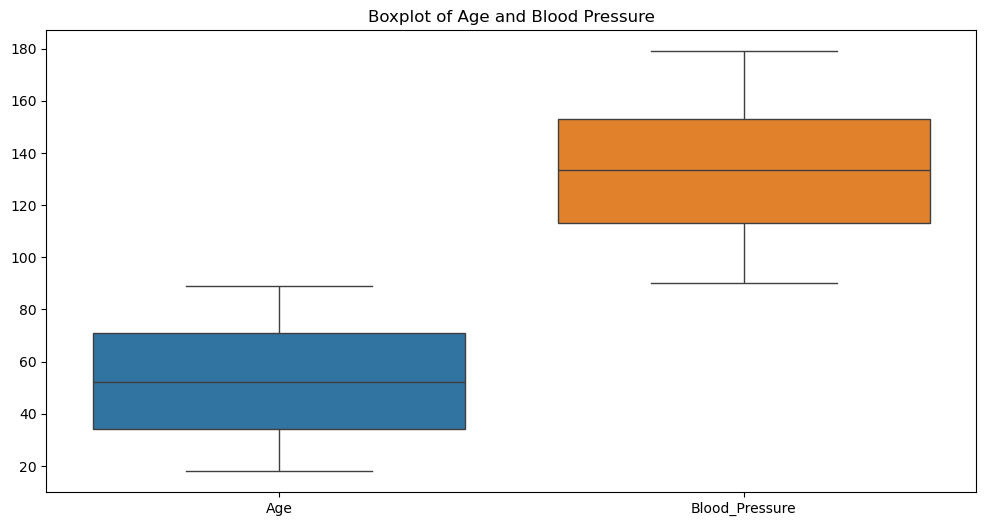

In [60]:
# Step 4: Detect and Handle Outliers
# Visualize the distribution of numerical columns using boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Blood_Pressure']])
plt.title('Boxplot of Age and Blood Pressure')
plt.show()

In [78]:
# For outlier treatment, we will apply capping using the 1st and 99th percentiles

# Capping for 'Age'
lower_cap = data['Age'].quantile(0.01)
upper_cap = data['Age'].quantile(0.99)
data.loc[:, 'Age'] = data['Age'].clip(lower=lower_cap, upper=upper_cap)

# Capping for 'Blood_Pressure'
lower_cap_bp = data['Blood_Pressure'].quantile(0.01)
upper_cap_bp = data['Blood_Pressure'].quantile(0.99)
data.loc[:, 'Blood_Pressure'] = data['Blood_Pressure'].clip(lower=lower_cap_bp, upper=upper_cap_bp)


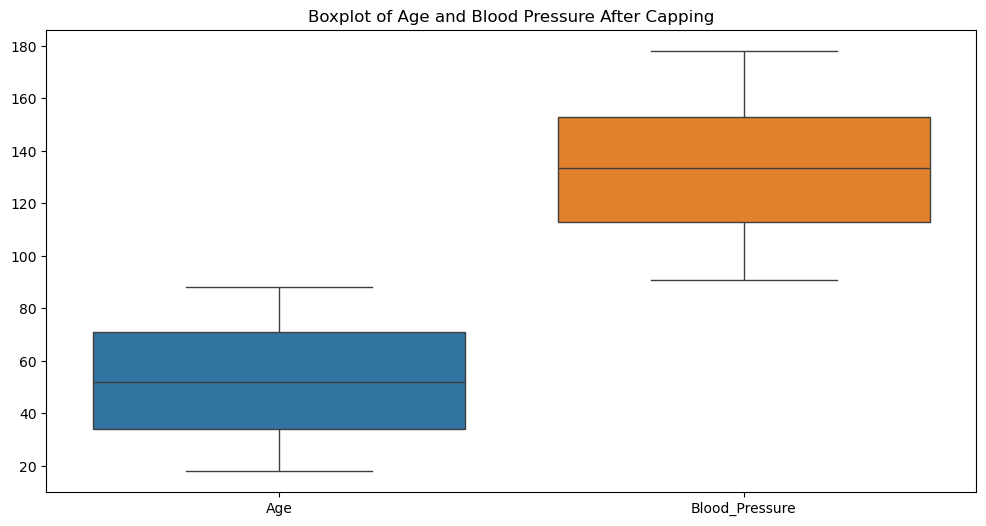

In [72]:
# Visualize the distribution after capping outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Blood_Pressure']])
plt.title('Boxplot of Age and Blood Pressure After Capping')
plt.show()


In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'data' is already loaded as a DataFrame.

# Step 1: Convert categorical variables into numerical representations
# For 'Gender' column, convert 'Male' to 0, 'Female' to 1, and 'Unknown' to -1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Unknown': -1})

# Step 2: Normalize numerical variables using Min-Max Scaling
# We will normalize the 'Age' and 'Blood_Pressure' columns
scaler_min_max = MinMaxScaler()
data[['Age', 'Blood_Pressure']] = scaler_min_max.fit_transform(data[['Age', 'Blood_Pressure']])

# Step 3: Standardize numerical variables using Standard Scaling
# Standard scaling (mean = 0, std = 1)
scaler_standard = StandardScaler()
data[['Age', 'Blood_Pressure']] = scaler_standard.fit_transform(data[['Age', 'Blood_Pressure']])

# Check the transformed data
print("Data after Standardization and Normalization:")
print(data[['Age', 'Blood_Pressure']].head())


Data after Standardization and Normalization:
        Age  Blood_Pressure
0  0.766753       -1.532723
1 -0.997542       -0.177275
2  1.672743       -1.293527
3  1.195906        0.340985
4 -0.711440        1.058575


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5372\570333895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Unknown': -1})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5372\570333895.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Age', 'Blood_Pressure']] = scaler_min_max.fit_transform(data[['Age', 'Blood_Pressure']])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5372\570333895.py:18: SettingWithCopyWarning: 
A value is trying to be s

In [88]:
# Step 6: Data Validation
# Ensure no missing values or duplicates remain
print("\nValidation: Missing Values After All Processing:")
print(data.isna().sum())

# Check if any duplicates remain after all processing
print("\nValidation: Number of Duplicates After All Processing:")
print(data.duplicated().sum())

# Check data types to ensure consistency
print("\nData Types After Processing:")
print(data.dtypes)


Validation: Missing Values After All Processing:
Patient_ID          0
Age                 0
Gender            500
Blood_Pressure      0
Cholesterol        20
Diabetes            0
Heart_Disease       0
dtype: int64

Validation: Number of Duplicates After All Processing:
0

Data Types After Processing:
Patient_ID          int64
Age               float64
Gender             object
Blood_Pressure    float64
Cholesterol       float64
Diabetes           object
Heart_Disease      object
dtype: object


In [158]:
# Step 7: Final Data Export
# Save the cleaned dataset to a new CSV file for further analysis
data.to_csv('Day_16_Healthcare_Data.csv', index=False)

print("\nCleaned dataset saved as 'Day_16_Healthcare_Data.csv'")


Cleaned dataset saved as 'Day_16_Healthcare_Data.csv'


In [114]:
data.head(20)

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,0.766753,NaN,-1.532723,122.0,No,No
1,2,-0.997542,NaN,-0.177275,191.0,No,No
2,3,1.672743,NaN,-1.293527,214.0,No,No
3,4,1.195906,NaN,0.340985,203.0,No,No
4,5,-0.711440,NaN,1.058575,217.0,No,No
5,6,-0.568389,NaN,-1.373259,104.0,No,No
6,7,-1.569746,NaN,0.022056,203.0,Yes,No
7,8,-0.663757,NaN,-1.094196,207.0,No,No
8,9,0.814437,NaN,-0.735401,164.0,Yes,No
9,10,-1.617430,NaN,1.616701,220.0,No,No
